In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=es---------es-tso-0006entrystorage,es---------es-tso-0006entrylng%20terminals,es---------es-tso-0006entryproduction,es---------es-tso-0006entrytransmission,es---------es-tso-0006entrytransmissionfr----------,es---------es-tso-0006entrytransmissionpt---------,es---------es-tso-0006exitstorage,es---------es-tso-0006exittransmissionpt---------,es---------es-tso-0006exitfinal%20consumers,es---------es-tso-0006exittransmissionfr----------,es---------es-tso-0009entrylng%20terminals,es---------es-tso-0006exitlng%20terminals&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesESES---------ES-TSO-0006entryLNG Te...        1   Aggregates   
1    1AggregatesESES---------ES-TSO-0006entryProduc...        1   Aggregates   
2    1AggregatesESES---------ES-TSO-0006entryStorag...        1   Aggregates   
3    1AggregatesESES---------ES-TSO-0006entryTransm...        1   Aggregates   
4    1AggregatesESES---------ES-TSO-0006entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
305  1AggregatesESES---------ES-TSO-0006entryTransm...        1   Aggregates   
306  1AggregatesESES---------ES-TSO-0006exitFinal C...        1   Aggregates   
307  1AggregatesESES---------ES-TSO-0006exitStorage...        1   Aggregates   
308  1AggregatesESES---------ES-TSO-0006exitTransmi...        1   Aggregates   
309  1AggregatesESES---------ES-TSO-0006exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day       value
0          entry    2  1668443809
1          entry    2     1317721
2          entry    2           0
3          entry    2   319610865
4          entry    2       21541
..           ...  ...         ...
305        entry    1    40072688
306         exit    1   733015052
307         exit    1       85355
308         exit    1   141621980
309         exit    1           0

[310 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         3.168914e+08
    exit          2.186806e+08
2   entry         3.333694e+08
    exit          2.341805e+08
3   entry         3.349443e+08
...                        ...
29  exit          2.521142e+08
30  entry         3.337404e+08
    exit          2.199363e+08
31  entry         3.051538e+08
    exit          2.062780e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

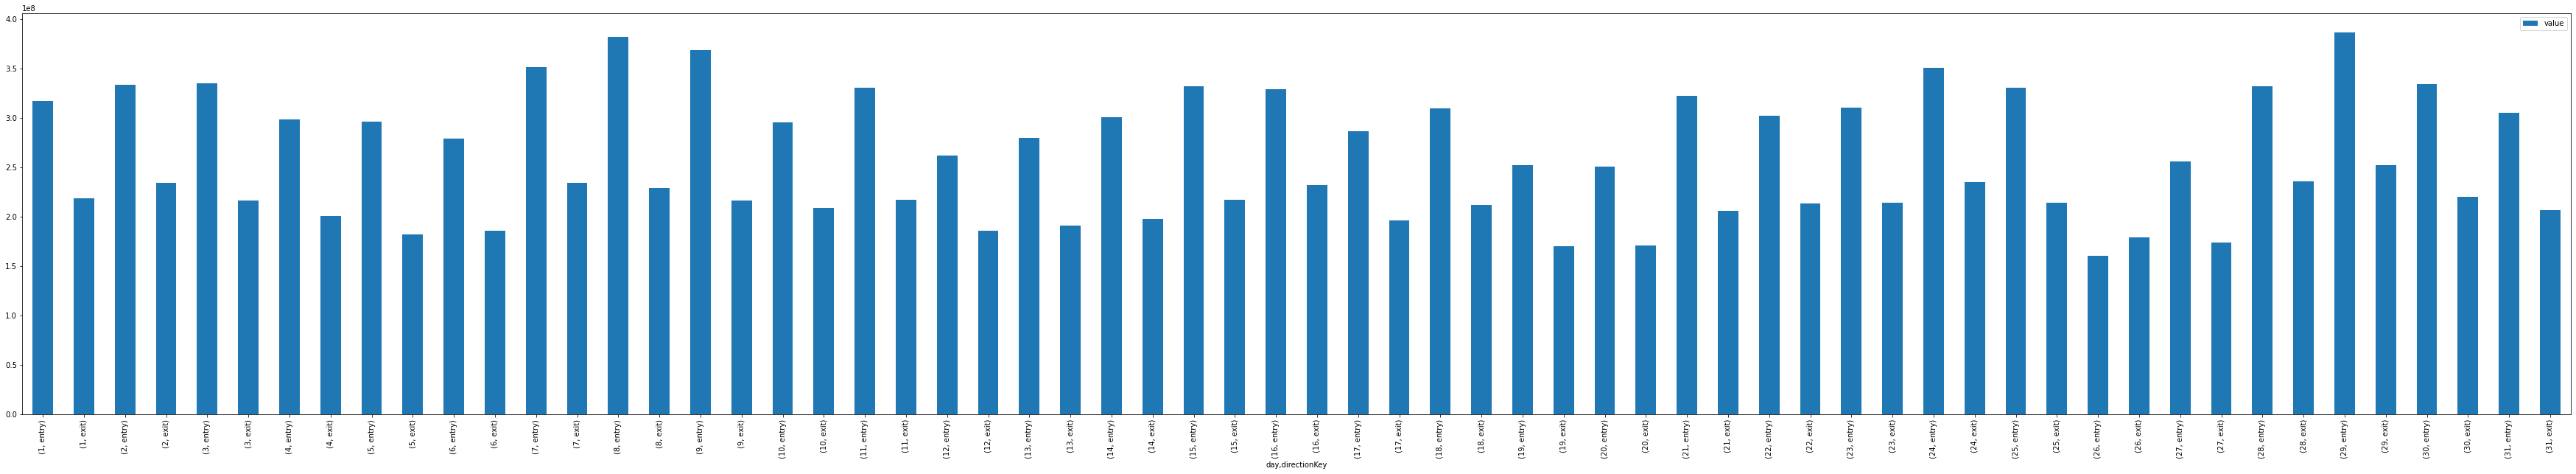

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))